# World Development Indicators in Southeast Asia

Name: Elena Lisa Monika Gaggia

Student ID: 12023845

Course: 0581 Data and Knowledge Engineering

### Introduction
In recent decades, the economic situation in Southeast Asia (SEA) has changed drastically. Through modernisation, many countries have managed to become stronger established economies with relatively high standards of living. Many different World Development Indicators (WDI) have contributed to this, which have been recorded by the World Bank (https://data.worldbank.org).

In my analysis, I limit myself to the analysis of access to electricity, compared to GDP per capita in US dollars and the Human Development Index (HDI) in the year 2020. The first two key factors were extracted from the World Bank database and were exported as a CSV file. The Human Development Index is filtered out by a SPARQL query in DBPedia.

### Create world map using Folium library

Even though this is not necessary for the project, I first plot all the countries in Southeast Asia on a world map for visualisation purposes. For this I use Folium, a library that allows me to create interactive maps. By clicking on the tiles, the name of the country is displayed.

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import folium

m = folium.Map(location=[2.2180, 115.6628], tiles = 'Stamen Toner', zoom_start = 4)

folium.Marker([0.7893, 113.9213], popup = '<i>Indonesia</i>').add_to(m)
folium.Marker([1.3521, 103.8198], popup = '<i>Singapore</i>').add_to(m)
folium.Marker([15.8700, 100.9925], popup = '<i>Thailand</i>').add_to(m)
folium.Marker([14.0583, 108.2772], popup = '<i>Vietnam</i>').add_to(m)
folium.Marker([12.5657, 104.9910], popup = '<i>Cambodia</i>').add_to(m)
folium.Marker([12.8797, 121.7740], popup = '<i>Philippines</i>').add_to(m)
folium.Marker([4.2105, 101.9758], popup = '<i>Malaysia</i>').add_to(m)
folium.Marker([19.8563, 102.4955], popup = '<i>Laos</i>').add_to(m)
folium.Marker([21.9162, 95.9560], popup = '<i>Myanmar</i>').add_to(m)
folium.Marker([4.5353, 114.7277], popup = '<i>Brunei</i>').add_to(m)
folium.Marker([8.8742, 125.7275], popup = '<i>East Timor</i>').add_to(m)
m

### Import CSV file from World Bank dataset

"[The] World Development Indicators (WDI) [database] is the primary World Bank collection of development indicators, compiled from officially recognized international sources. It presents the most current and accurate global development data available, and includes national, regional and global estimates." (Source: https://databank.worldbank.org/home.aspx)

In order to access the data, I make a preselection on the website for the countries, the desired indices and the desired year. I can then download the data as a CSV, which I then uploaded to my GitHub page.

In the following step, the program downloads the CSV file from GitHub and saves it as a new file in the register. Then it loads the SQL extension and creates a database. It then drops the country table and loads the CSV data into the database. The result can then be seen in the output.

In the next steps I access the data on access to electricity. The data on GDP per capita will be accessed later.

In [3]:
import requests

r = requests.get('https://raw.githubusercontent.com/tradybaby/wdisea/main/access_to_electricity_sea_2020.csv')
f = open('wdi_sea_electr.csv', 'wb')
f.write(r.content)
f.close()

In [4]:
%load_ext sql

In [5]:
%sql sqlite:///wdi_sea.db

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import sqlite3 
import pandas  
conn = sqlite3.connect('wdi_sea.db')

In [8]:
%%sql

drop table if exists country;

 * sqlite:///wdi_sea.db
Done.


[]

In [9]:
pandas.read_csv('wdi_sea_electr.csv').to_sql('wdi_sea', conn, index = False)

16

In [10]:
%%sql

select * from wdi_sea;

 * sqlite:///wdi_sea.db
Done.


Country Name,Country Code,Series Name,Series Code,2020 [YR2020]
Indonesia,IDN,Access to electricity (% of population),EG.ELC.ACCS.ZS,96.9499969482422
Singapore,SGP,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0
Thailand,THA,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0
Vietnam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0
Cambodia,KHM,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.4000015258789
Philippines,PHL,Access to electricity (% of population),EG.ELC.ACCS.ZS,96.8423843383789
Malaysia,MYS,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0
Laos,LAO,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0
Myanmar,MMR,Access to electricity (% of population),EG.ELC.ACCS.ZS,70.3971939086914
Brunei,BRN,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.0


### Graphical analysis

To put the data in context and make it easier to interpret, I start with a graphical representation of the data. As we know from our data and can see in the graph in Singapore, Thailand, Vietnam, Malaysia, Laos and Brunei 100% of the population have access to electricity.
In Indonesia, Cambodia, the Philippines and East Timor the electricity supply is also pretty good. Only in Myanmar it is rather low with only 70%

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


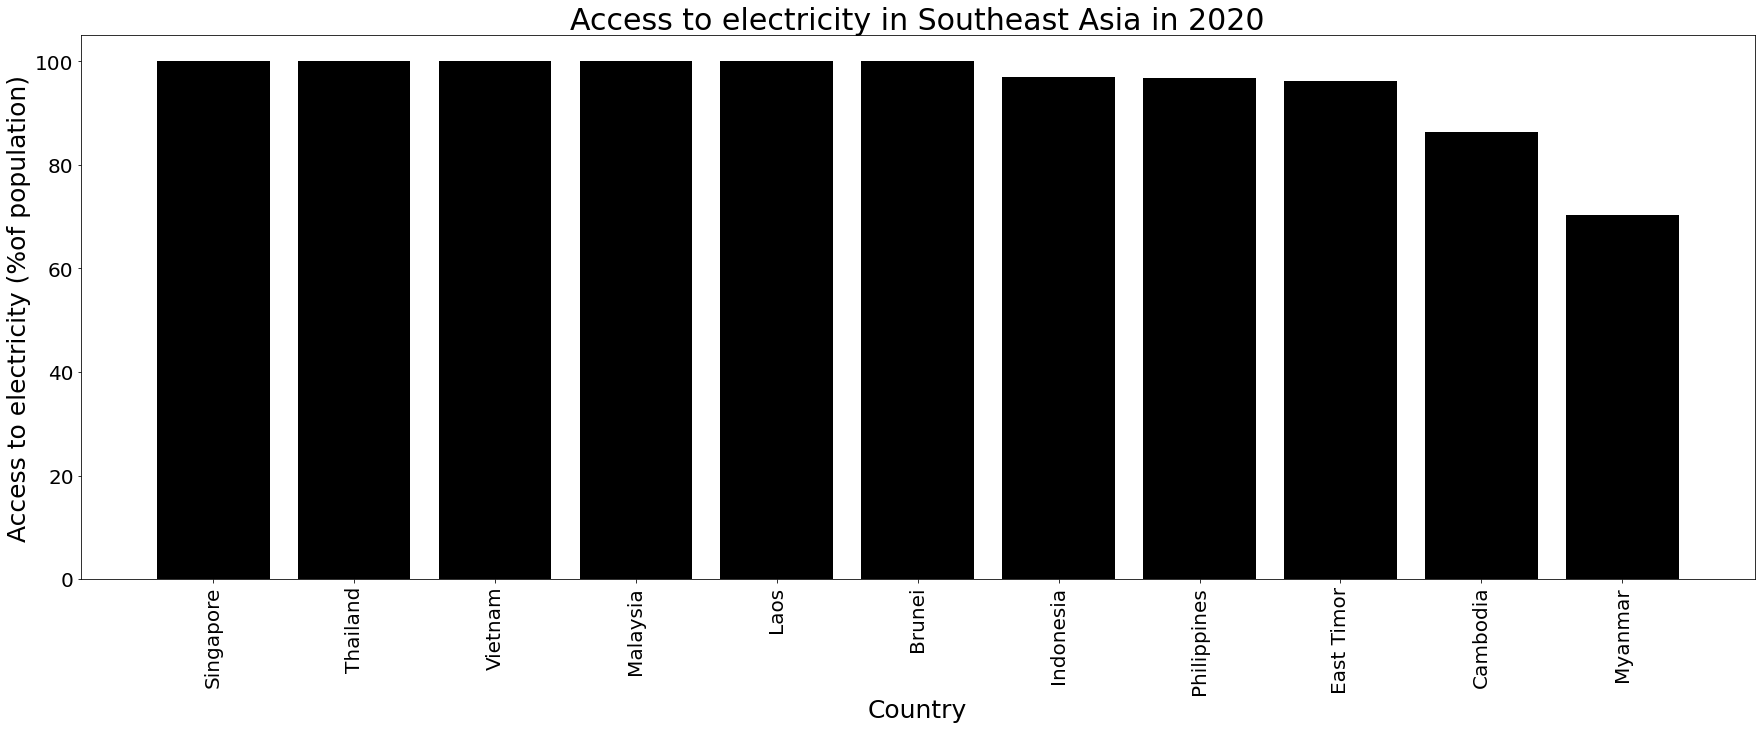

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('https://raw.githubusercontent.com/tradybaby/wdisea/main/access_to_electricity_sea_2020.csv')
df = pd.DataFrame(data)

sorted_df = df.sort_values(by=['2020 [YR2020]'], ascending=False)
sorted_df_head = sorted_df.head(11)

X = list(sorted_df_head.iloc[:, 0])
Y = list(sorted_df_head.iloc[:, 4])

plt.rcParams['figure.figsize'] = (30, 10)
plt.bar(X, Y, color='black')
plt.title('Access to electricity in Southeast Asia in 2020', fontsize = 30)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('Access to electricity (%of population)', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

### Access data from DBPedia

In order to be able to better assess the situation, data on the Human Development Index should now be used.

"The Human Development Index (HDI) is a statistic composite index of life expectancy, education (mean years of schooling completed and expected years of schooling upon entering the education system), and per capita income indicators, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher." (Source: https://en.wikipedia.org/wiki/Human_Development_Index)

This data can be found in DBPedia. With a SPARQL query, it can be loaded directly into the Jupyter Notebook. The program extracts all available data on countries, their total population and the HDI.

To do this the program loads the SPARQLWrapper package to execute the query. The country name has a filter to only allow the English names of the country to avoid multiple entries from other languages. The program outputs the result of the query in a JSON format.

In [13]:
pip install SPARQLWrapper

Note: you may need to restart the kernel to use updated packages.


In [14]:
from SPARQLWrapper import SPARQLWrapper, JSON, CSV

In [15]:
sparql = SPARQLWrapper('http://dbpedia.org/sparql')

In [16]:
sparql.setQuery("""
SELECT ?country ?hdi
    WHERE { 
    ?place rdf:type dbo:Country .
    ?place rdfs:label ?country .
    filter(lang(?country) = 'en')
    ?place dbp:hdi ?hdi .
    }
    LIMIT 5000
""")

In [17]:
sparql.setReturnFormat(JSON)

In [18]:
countries = sparql.query().convert()

To display the results in a nicer way, they can be displayed as a HTML table. To do this, the program imports the display package and creates a table with the desired header and adds each row (country, population and HDI) with a for loop.

In [19]:
from IPython.display import HTML, display

tab = '<table>'
tab += '<h4>Country, Population and Human Development Index</h4><table>\n'
for res in countries['results']['bindings']:
    tab += '<tr><td>%s<td>%s' % (res['country']['value'],
                                 res['hdi']['value'])
display(HTML(tab+'</table>'))

The results are now inserted into a table in order to later combine it with the table containing data about the access to electricity. In order to do this, the following function inserts the individual results as rows into a table.

In [20]:
f = open('wdi_sea_hdi.csv', 'w')
f.write('country;hdi\n')
for res in countries['results']['bindings']:
    f.write(res['country']['value'] + ';' + res['hdi']['value'] + '\n')
f.close()

In [21]:
%%sql

drop table if exists hdi;

 * sqlite:///wdi_sea.db
Done.


[]

In [22]:
pandas.read_csv('wdi_sea_hdi.csv', delimiter=";").to_sql('hdi', conn, index = False)

303

In [23]:
%%sql

select * from hdi limit 20;

 * sqlite:///wdi_sea.db
Done.


country,hdi
Andean Community,0.781
Andorra,0.868
Uruguay,0.817
Uzbekistan,0.72
Vanuatu,0.609
Venezuela,0.711
Vietnam,0.704
Wales,0.901
Democratic Republic of Afghanistan,0.316
Democratic Republic of the Congo,0.48


### Combining the data

Through a join statement, the gathered data gets combined in the next step. The join combines the data by looking at the matching country names from the data in the CSV file and the data from the SPARQL query. 

In [24]:
%%sql
drop view if exists ehdi;
create view ehdi as
select country, hdi, "2020 [YR2020]" as electr
from wdi_sea join hdi on wdi_sea."Country Name" = hdi.country;

 * sqlite:///wdi_sea.db
Done.
Done.


[]

In [25]:
%sql select * from ehdi;

 * sqlite:///wdi_sea.db
Done.


country,hdi,electr
Indonesia,0.718,96.9499969482422
Singapore,0.938,100.0
Thailand,0.777,100.0
Vietnam,0.704,100.0
Cambodia,0.594,86.4000015258789
Philippines,0.718,96.8423843383789
Malaysia,0.81,100.0
Laos,0.613,100.0
Myanmar,0.583,70.3971939086914
Brunei,0.838,100.0


In [26]:
df = pandas.read_sql_query("SELECT hdi, electr FROM ehdi", conn)

Now it is interesting to calculate the correlation between the two variables. With a result of about 0.6, one speaks of a moderate correlation.

In [27]:
df["hdi"].astype("float").corr(df["electr"])

0.5820109865616289

### Inclusion of an additional factor

Since the correlation was not so high in this case, we now look at another factor, namely GDP per capita. To do this, we simply repeat the steps shown earlier .

In [29]:
import requests

r = requests.get('https://raw.githubusercontent.com/tradybaby/wdisea/main/gdp_per_capita_sea_2020.csv')
f = open('wdi_sea_gdp.csv', 'wb')
f.write(r.content)
f.close()

In [30]:
%reload_ext sql

In [31]:
%sql sqlite:///gdp.db

In [32]:
import sqlite3
import pandas
conn = sqlite3.connect("gdp.db")

In [33]:
%%sql

drop table if exists gdp;

 * sqlite:///gdp.db
   sqlite:///wdi_sea.db
Done.


[]

In [34]:
pandas.read_csv('wdi_sea_gdp.csv').to_sql('gdp', conn, index = False)

16

In [35]:
%%sql

select * from gdp;

 * sqlite:///gdp.db
   sqlite:///wdi_sea.db
Done.


Country Name,Country Code,Series Name,Series Code,2020 [YR2020]
Indonesia,IDN,GDP per capita (current US$),NY.GDP.PCAP.CD,3894.27220196922
Singapore,SGP,GDP per capita (current US$),NY.GDP.PCAP.CD,60729.4503486794
Thailand,THA,GDP per capita (current US$),NY.GDP.PCAP.CD,6990.93550262041
Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,3586.34730171843
Cambodia,KHM,GDP per capita (current US$),NY.GDP.PCAP.CD,1577.91174726099
Philippines,PHL,GDP per capita (current US$),NY.GDP.PCAP.CD,3224.42255131214
Malaysia,MYS,GDP per capita (current US$),NY.GDP.PCAP.CD,10160.7832470071
Laos,LAO,GDP per capita (current US$),NY.GDP.PCAP.CD,2593.35509719847
Myanmar,MMR,GDP per capita (current US$),NY.GDP.PCAP.CD,1477.45287032594
Brunei,BRN,GDP per capita (current US$),NY.GDP.PCAP.CD,27179.4119853371


Here, too, the graphic analysis is very interesting. It becomes visible that GDP is extraordinarily high in Singapore. The other countries fluctuate around a lower value.

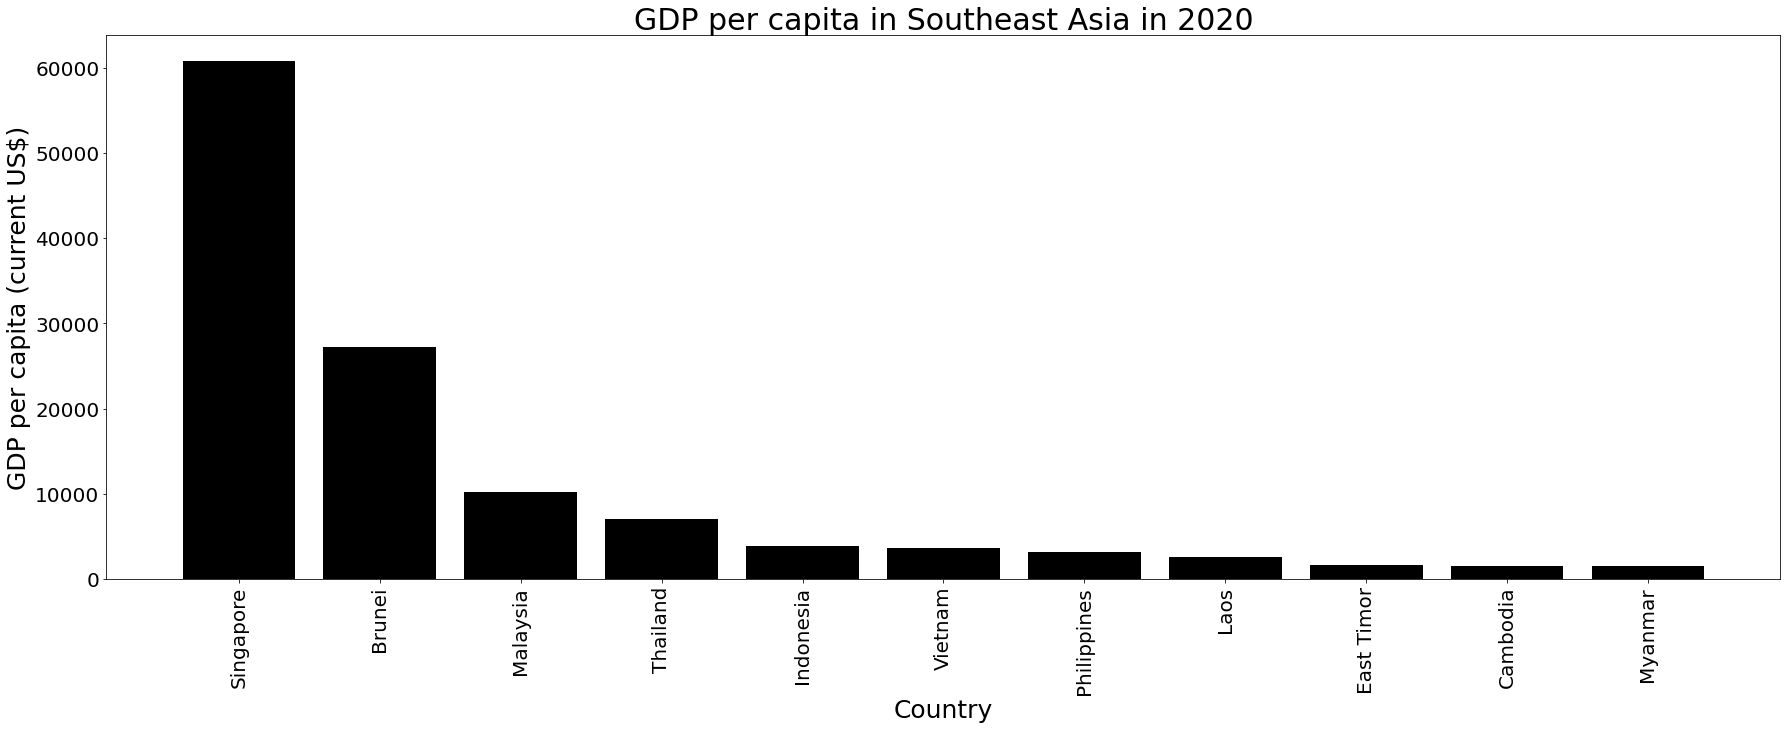

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('https://raw.githubusercontent.com/tradybaby/wdisea/main/gdp_per_capita_sea_2020.csv')
df = pd.DataFrame(data)

sorted_df = df.sort_values(by=['2020 [YR2020]'], ascending=False)
sorted_df_head = sorted_df.head(11)

X = list(sorted_df_head.iloc[:, 0])
Y = list(sorted_df_head.iloc[:, 4])

plt.rcParams['figure.figsize'] = (30, 10)
plt.bar(X, Y, color='black')
plt.title('GDP per capita in Southeast Asia in 2020', fontsize = 30)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('GDP per capita (current US$)', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [37]:
f = open('wdi_sea_hdi.csv', 'w')
f.write('country;hdi\n')
for res in countries['results']['bindings']:
    f.write(res['country']['value'] + ';' + res['hdi']['value'] + '\n')
f.close()

In [38]:
%%sql

drop table if exists hdi;

 * sqlite:///gdp.db
   sqlite:///wdi_sea.db
Done.


[]

In [ ]:
pandas.read_csv('wdi_sea_hdi.csv', delimiter=";").to_sql('hdi', conn, index = False)

In [ ]:
%%sql

select * from hdi limit 20;

In [ ]:
%%sql
drop view if exists gdphdi;
create view gdphdi as
select country, hdi, "2020 [YR2020]" as gdp
from gdp join hdi on gdp."Country Name" = hdi.country;

In [ ]:
%sql select * from gdphdi;

In [ ]:
df = pandas.read_sql_query("SELECT hdi, gdp FROM gdphdi", conn)

In this case, the correlation is very strongly evident with a value of approximately 0.8.

In [ ]:
df["hdi"].astype("float").corr(df["gdp"])

### Interpretation of data

With this result, the situation can now be interpreted very well.

**Countries with an HDI above 0.9 (extraordinarily high):**

Singapore is known to be one of the most developed and richest countries in SEA and accordingly has a very high GDP and a very high HDI. Also 100% of the population have access to electricity.

**Countries with an HDI above 0.8 (very high):**

The comparison between Malaysia and Brunei is very interesting. The HDI is similar and both countries have 100% access to electricity but the GDP per capita is very different. Here it would be interesting to find out where the differences come from using a range of other indicators.

**Countries with an HDI above 0.7 (high):**

Indonesia, Thailand and the Philippines all have an HDI above 0.7, but Thailand has a GDP per capita almost twice as high as the other two countries. Does the lack of 100% access to electricity in Indonesia and the Philippines have anything to do with it?

**Countries with an HDI above 0.55 (medium):**

Cambodia, Laos and East Timor fall into this category. Cambodia has the lowest access to electricity of all countries in SEA and also the lowest HDI. GDP per capita is the second lowest after East Timor. Laos and East Timor also have very low GDP per capita but good to very good access to electricity.

**Countries with an HDI under 0.549 (low):**

No country in SEA has a HDI lower than 0.549.